# 導入 module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
pd.set_option('display.max_column',85)

In [130]:
from sklearn.linear_model import SGDRegressor,Lasso ,Ridge, ElasticNet
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, KFold

# 讀入資料, 檢視資料分布

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
568,569,50,RL,79.0,12327,Pave,NaN,IR1,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,1.5Fin,8,8,1983,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1441,Unf,0,55,1496,GasA,Ex,Y,SBrkr,1496,636,0,2132,1,0,1,1,1,1,Gd,5,Min2,1,Gd,BuiltIn,1983.0,Fin,2,612,Gd,TA,Y,349,40,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,316600
383,384,45,RH,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1.5Unf,6,3,1928,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,Fa,No,Unf,0,Unf,0,784,784,GasA,TA,N,FuseA,784,0,0,784,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,360,Fa,Fa,N,0,0,91,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,76000
768,769,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1836,1860,GasA,Ex,Y,SBrkr,1836,0,0,1836,0,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,Fin,2,484,TA,TA,Y,120,33,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,216837
922,923,20,RL,65.0,10237,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,28,Unf,0,1288,1316,GasA,Ex,Y,SBrkr,1316,0,0,1316,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2005.0,Fin,2,397,TA,TA,Y,100,0,0,23,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,169990
1215,1216,20,RL,99.0,7094,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,180,LwQ,374,340,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1966.0,RFn,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,125000
806,807,80,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1967,1967,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Av,ALQ,400,Rec,480,100,980,GasA,Gd,Y,SBrkr,980,0,0,980,0,0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1967.0,Fin,1,384,TA,TA,Y,68,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,135500
1013,1014,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,4,1910,2006,Hip,CompShg,MetalSd,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,247,Rec,465,310,1022,GasW,TA,N,SBrkr,1022,0,0,1022,1,0,1,0,2,1,TA,4,Maj2,0,NaN,Detchd,1956.0,Unf,1,280,TA,TA,Y,0,30,226,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,85000
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
187,188,50,RL,60.0,10410,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,1916,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,660,660,GasA,Ex,Y,SBrkr,808,704,144,1656,0,0,2,1,3,1,TA,8,Min2,0,NaN,Detchd,1916.0,Unf,1,180,Fa,Fa,N,0,0,0,140,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,135000
402,403,30,RL,60.0,10200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1940,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,672,672,Gas

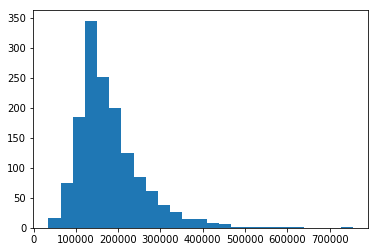

In [9]:
trainDataSet = pd.read_csv('train.csv')
plt.hist(trainDataSet['SalePrice'],bins = 25,cumulative=False)
trainDataSet.sample(10)

# 數值特徵分佈檢視

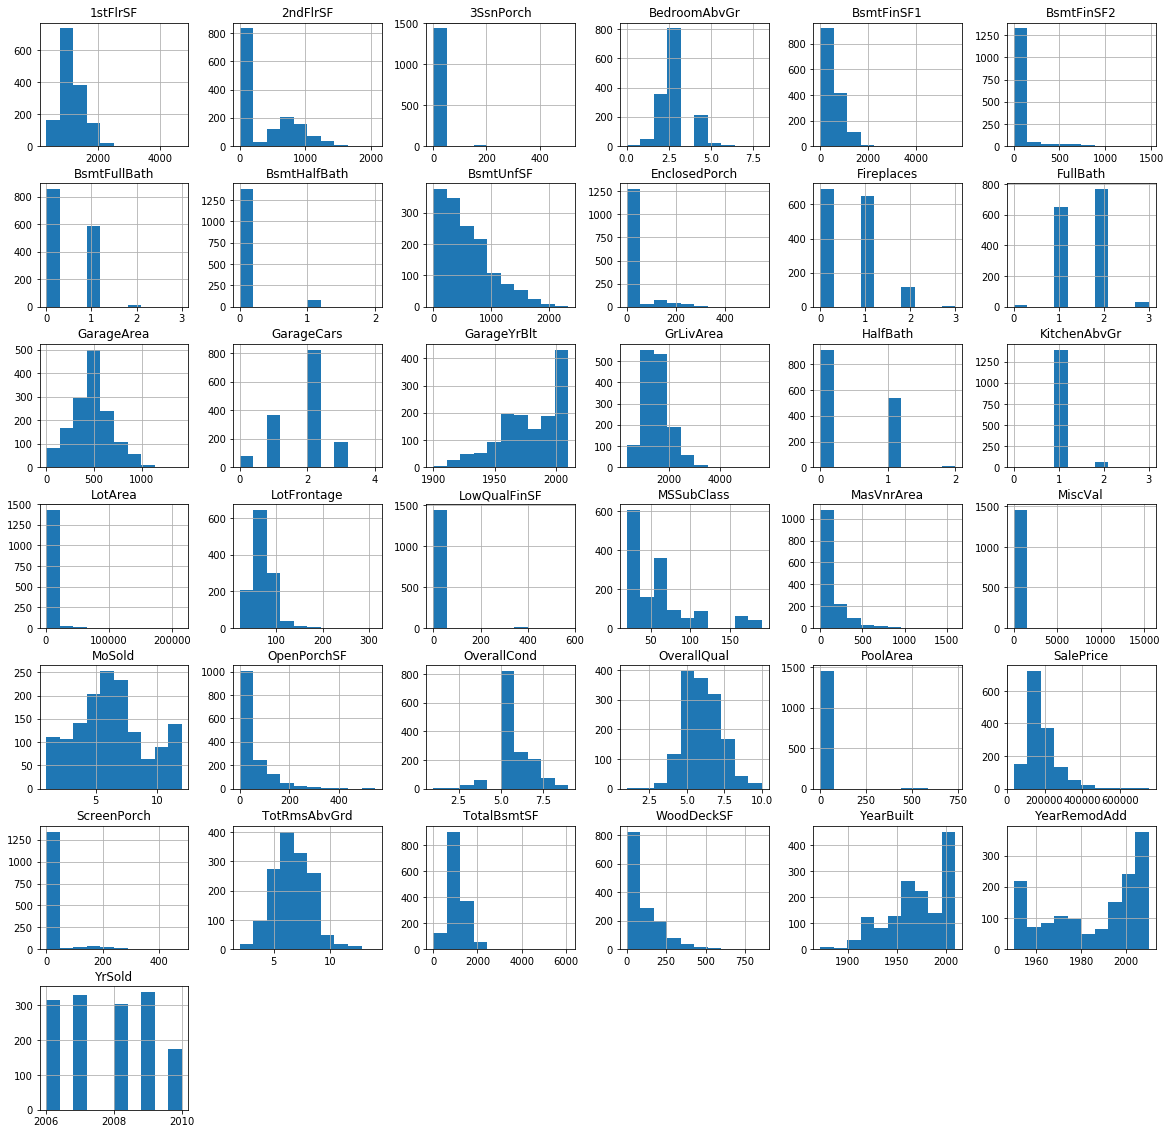

In [58]:
trainDataValue = trainDataSet['Id']

for i in trainDataSet.columns:
    if trainDataSet[i].dtype != 'object':
        trainDataValue = pd.merge(trainDataValue, trainDataSet[i], left_index=True, right_index=True)
trainDataValue = trainDataValue.drop(['Id_x','Id_y'], axis = 1)

hist_train = trainDataValue.hist(figsize=(20,20))

> LotArea 有極端值 (>100000)<br/>
> MasVnrArea 有極端值 (>1200)<br/>
> TotalBsmtSF 有極端值 (>4000)<br/>
> 1stFlrSF 有極端值 (>4000)<br/>
> GrLivArea 脫離主分布 (>4000)<br/>
> SalePrice 脫離主分布 (>650000)<br/>

# 數值特徵去除極端值

In [114]:
print("去除極端前後資料量:",trainDataSet.shape)
trainDataSet = trainDataSet[trainDataSet['SalePrice']<500000].reset_index(drop=True)
trainDataSet = trainDataSet[trainDataSet['MasVnrArea']<1200].reset_index(drop=True)
trainDataSet = trainDataSet[trainDataSet['LotArea']<100000].reset_index(drop=True)
trainDataSet = trainDataSet[trainDataSet['TotalBsmtSF']<4000].reset_index(drop=True)
trainDataSet = trainDataSet[trainDataSet['1stFlrSF']<4000].reset_index(drop=True)
trainDataSet = trainDataSet[trainDataSet['GrLivArea']<4000].reset_index(drop=True)
trainDataSet['HouseYr'] = trainDataSet['YrSold'] - trainDataSet['YearBuilt']
print("去除極端值後資料量:",trainDataSet.shape)

trainDataValue = trainDataSet['Id']

for i in trainDataSet.columns:
    if trainDataSet[i].dtype != 'object':
        trainDataValue = pd.merge(trainDataValue, trainDataSet[i], left_index=True, right_index=True)
trainDataValue = trainDataValue.drop(['Id_x','Id_y'], axis = 1)

trainDataValue.sample(5)

去除極端前後資料量: (1441, 82)
去除極端值後資料量: (1436, 82)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseYr
564,80,76.0,9967,7,5,2000,2000,0.0,0,0,384,384,774,656,0,1430,0,0,2,1,3,1,8,1,2000.0,2,400,100,0,0,0,0,0,0,12,2007,170000,7
712,20,86.0,13286,9,5,2007,2008,340.0,1234,0,464,1698,1698,0,0,1698,1,0,2,0,3,1,8,1,2007.0,3,768,327,64,0,0,0,0,0,2,2009,320000,2
1420,20,63.0,8500,7,5,2004,2004,106.0,0,0,1422,1422,1422,0,0,1422,0,0,2,0,3,1,7,0,2004.0,2,626,192,60,0,0,0,0,0,11,2007,179600,3
368,60,65.0,8200,7,5,2003,2004,0.0,0,0,847,847,847,1081,0,1928,0,0,2,1,4,1,8,1,2003.0,2,434,100,48,0,0,0,0,0,7,2007,219500,4
1361,50,40.0,5436,4,8,1922,2007,0.0,735,0,61,796,796,358,0,1154,1,0,1,0,3,1,7,0,1922.0,1,240,0,96,0,0,0,0,0,5,2010,125500,88


# 類別特徵檢視

In [115]:
trainDataClass = trainDataSet['Id']
for i in trainDataSet.columns:
    if trainDataSet[i].dtype == 'object':
        trainDataClass = pd.merge(trainDataClass, trainDataSet[i], left_index=True, right_index=True)
trainDataClass = trainDataClass.drop(['Id'], axis = 1)

In [116]:
i = 1
for col in trainDataClass.columns:
    if(i%5!=0):
        print("%-15s : %d\t" % (col,np.where(trainDataClass[col].isnull())[0].size),end =' ')
    else:
        print("%-15s : %d\t" % (col,np.where(trainDataClass[col].isnull())[0].size))
    i+=1

MSZoning        : 0	 Street          : 0	 Alley           : 1347	 LotShape        : 0	 LandContour     : 0	
Utilities       : 0	 LotConfig       : 0	 LandSlope       : 0	 Neighborhood    : 0	 Condition1      : 0	
Condition2      : 0	 BldgType        : 0	 HouseStyle      : 0	 RoofStyle       : 0	 RoofMatl        : 0	
Exterior1st     : 0	 Exterior2nd     : 0	 MasVnrType      : 0	 ExterQual       : 0	 ExterCond       : 0	
Foundation      : 0	 BsmtQual        : 37	 BsmtCond        : 37	 BsmtExposure    : 38	 BsmtFinType1    : 37	
BsmtFinType2    : 38	 Heating         : 0	 HeatingQC       : 0	 CentralAir      : 0	 Electrical      : 1	
KitchenQual     : 0	 Functional      : 0	 FireplaceQu     : 686	 GarageType      : 81	 GarageFinish    : 81	
GarageQual      : 81	 GarageCond      : 81	 PavedDrive      : 0	 PoolQC          : 1431	 Fence           : 1156	
MiscFeature     : 1384	 SaleType        : 0	 SaleCondition   : 0	 

> 對照train.csv發現會有NA值，但此值不代表遺失值<br/>
> 故處理方式為補上類別NA

In [117]:
trainDataClass = trainDataClass.fillna("NA")

In [118]:
i = 1
for col in trainDataClass.columns:
    if(i%5!=0):
        print("%-15s : %d\t" % (col,np.where(trainDataClass[col].isnull())[0].size),end =' ')
    else:
        print("%-15s : %d\t" % (col,np.where(trainDataClass[col].isnull())[0].size))
    i+=1

MSZoning        : 0	 Street          : 0	 Alley           : 0	 LotShape        : 0	 LandContour     : 0	
Utilities       : 0	 LotConfig       : 0	 LandSlope       : 0	 Neighborhood    : 0	 Condition1      : 0	
Condition2      : 0	 BldgType        : 0	 HouseStyle      : 0	 RoofStyle       : 0	 RoofMatl        : 0	
Exterior1st     : 0	 Exterior2nd     : 0	 MasVnrType      : 0	 ExterQual       : 0	 ExterCond       : 0	
Foundation      : 0	 BsmtQual        : 0	 BsmtCond        : 0	 BsmtExposure    : 0	 BsmtFinType1    : 0	
BsmtFinType2    : 0	 Heating         : 0	 HeatingQC       : 0	 CentralAir      : 0	 Electrical      : 0	
KitchenQual     : 0	 Functional      : 0	 FireplaceQu     : 0	 GarageType      : 0	 GarageFinish    : 0	
GarageQual      : 0	 GarageCond      : 0	 PavedDrive      : 0	 PoolQC          : 0	 Fence           : 0	
MiscFeature     : 0	 SaleType        : 0	 SaleCondition   : 0	 

# 類別特徵數值化處理(label encoding)

### 建立對照字典

In [119]:
Exter_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
Bsmt_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
BsmtEx_qualDict = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
BsmtFT_qualDict = {'GLQ':6 ,'ALQ':5 ,'BLQ':4 ,'Rec':3 ,'LwQ':2 ,'Unf':1 ,'NA':0}
Heating_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
Kitchen_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
Fireplace_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
GarageFsh_qualDict = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
Garage_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
Pool_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0}
Fence_qualDict = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

### 將部分類別編碼為有大小的數值

In [157]:
try:
    for index in range(trainDataClass.shape[0]):
        trainDataValue.loc[index,'ExterQual'] = Exter_qualDict[trainDataClass.loc[index,'ExterQual']]
        trainDataValue.loc[index,'ExterCond'] = Exter_qualDict[trainDataClass.loc[index,'ExterCond']]
        trainDataValue.loc[index,'BsmtQual'] = Bsmt_qualDict[trainDataClass.loc[index,'BsmtQual']]
        trainDataValue.loc[index,'BsmtCond'] = Bsmt_qualDict[trainDataClass.loc[index,'BsmtCond']]
        trainDataValue.loc[index,'BsmtExposure'] = BsmtEx_qualDict[trainDataClass.loc[index,'BsmtExposure']]
        trainDataValue.loc[index,'BsmtFinType1'] = BsmtFT_qualDict[trainDataClass.loc[index,'BsmtFinType1']]
        trainDataValue.loc[index,'BsmtFinType2'] = BsmtFT_qualDict[trainDataClass.loc[index,'BsmtFinType2']]
        trainDataValue.loc[index,'HeatingQC'] = Heating_qualDict[trainDataClass.loc[index,'HeatingQC']]
        trainDataValue.loc[index,'KitchenQual'] = Kitchen_qualDict[trainDataClass.loc[index,'KitchenQual']]
        trainDataValue.loc[index,'FireplaceQu'] = Fireplace_qualDict[trainDataClass.loc[index,'FireplaceQu']]
        trainDataValue.loc[index,'GarageFinish'] = GarageFsh_qualDict[trainDataClass.loc[index,'GarageFinish']]
        trainDataValue.loc[index,'GarageQual'] = Garage_qualDict[trainDataClass.loc[index,'GarageQual']]
        trainDataValue.loc[index,'GarageCond'] = Garage_qualDict[trainDataClass.loc[index,'GarageCond']]
        trainDataValue.loc[index,'PoolQC'] = Pool_qualDict[trainDataClass.loc[index,'PoolQC']]
        trainDataValue.loc[index,'Fence'] = Fence_qualDict[trainDataClass.loc[index,'Fence']]
    trainDataClass = trainDataClass.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence'],axis=1)
except:
    print("Drop Finish.")

Drop Finish.


# 分析數值特徵與預測目標之關聯性
### 選擇中度以上關聯性的數值

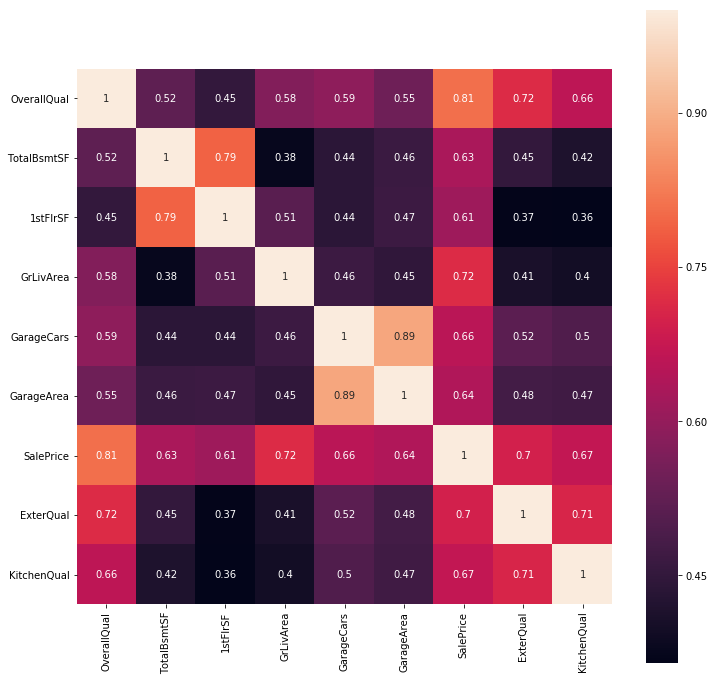

In [121]:
CorrMatrix = trainDataValue.corr()
CorrMatrix = CorrMatrix[(CorrMatrix['SalePrice']>0.6) | (CorrMatrix['SalePrice']<-0.6)].T
CorrMatrix = CorrMatrix[(CorrMatrix['SalePrice']>0.6) | (CorrMatrix['SalePrice']<-0.6)]
plt.figure(figsize=(12,12))
sns.heatmap(CorrMatrix, square=True,annot=True)

In [174]:
CorrMatrix = trainDataValue.corr()
HighCorrList=[]
for col in CorrMatrix.columns:
    if CorrMatrix.loc['SalePrice',col]>0.4:
        HighCorrList.append(col)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']


### 使用盒鬚圖觀察各類別在預測目標分佈的差異性

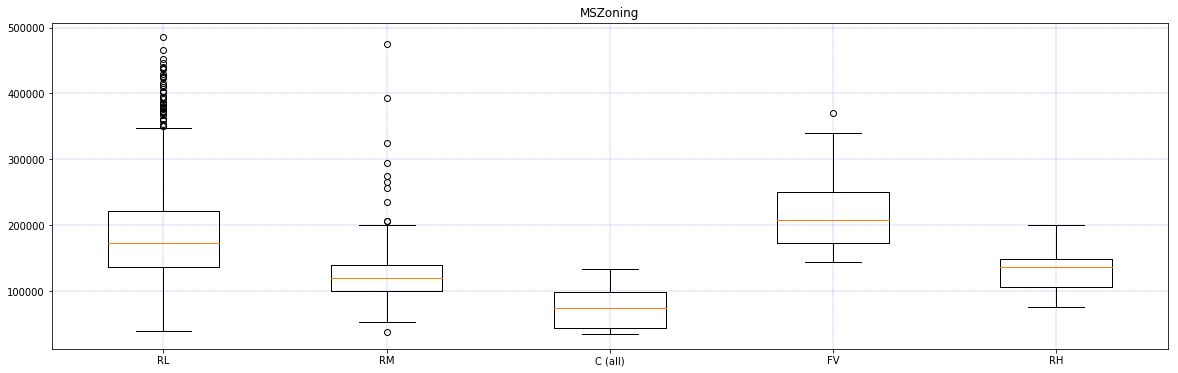

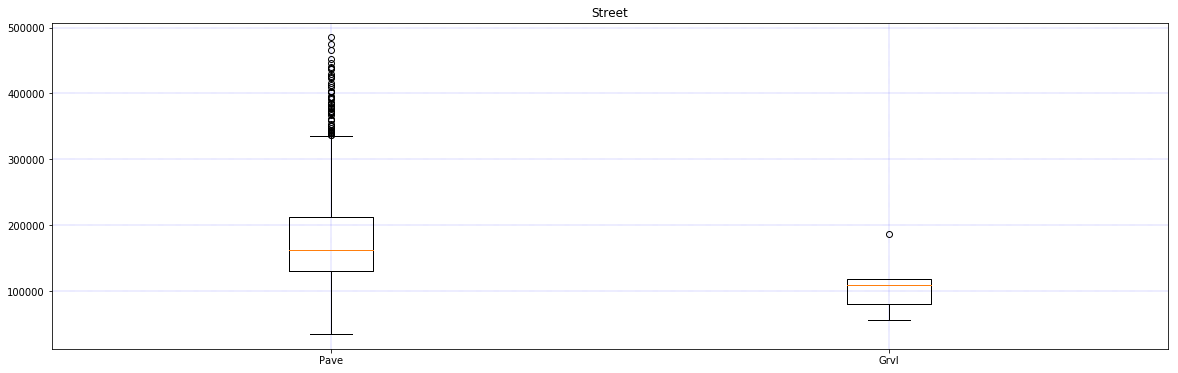

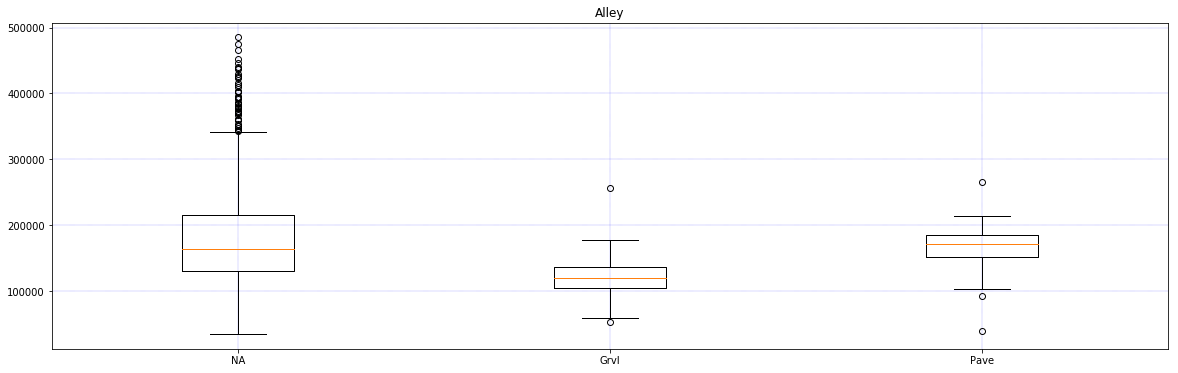

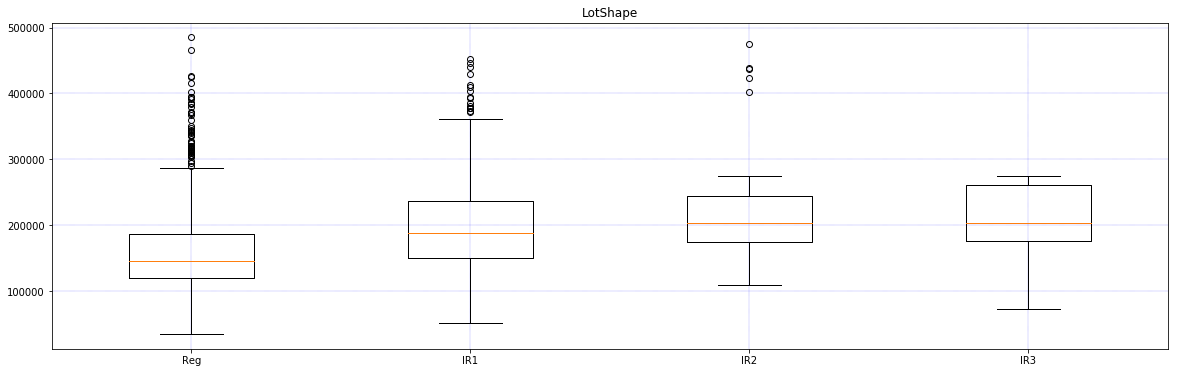

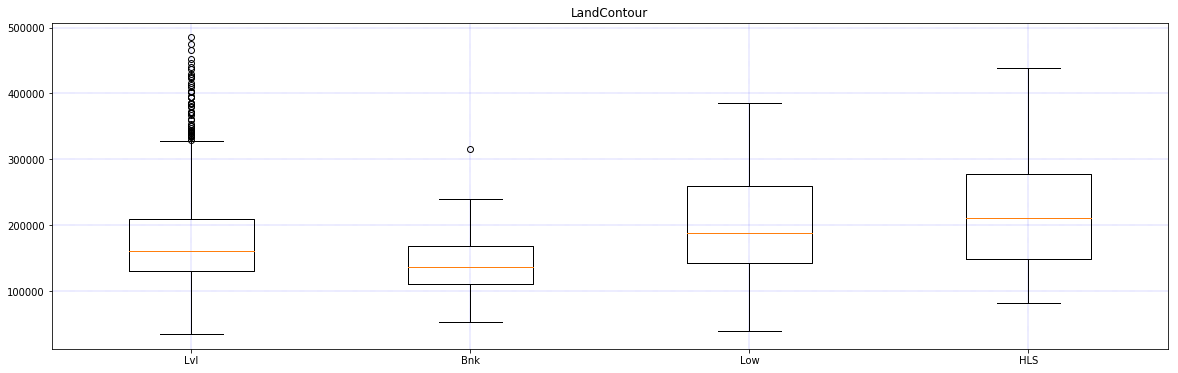

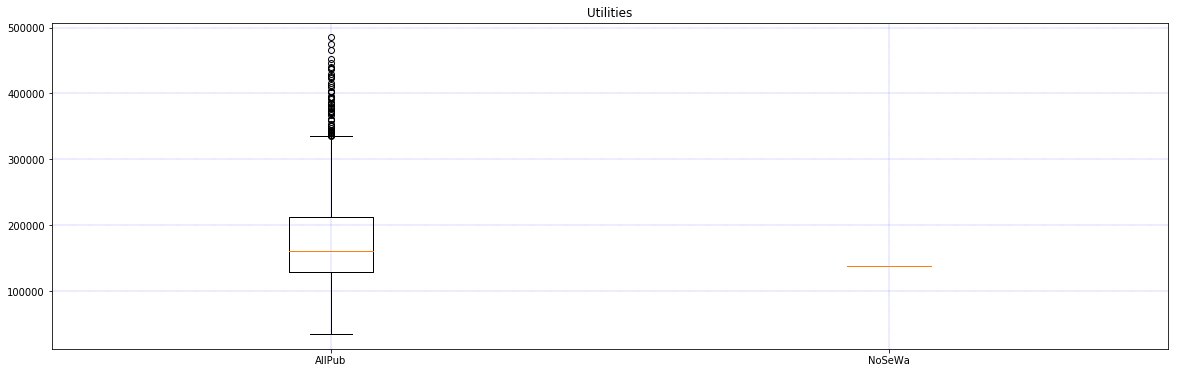

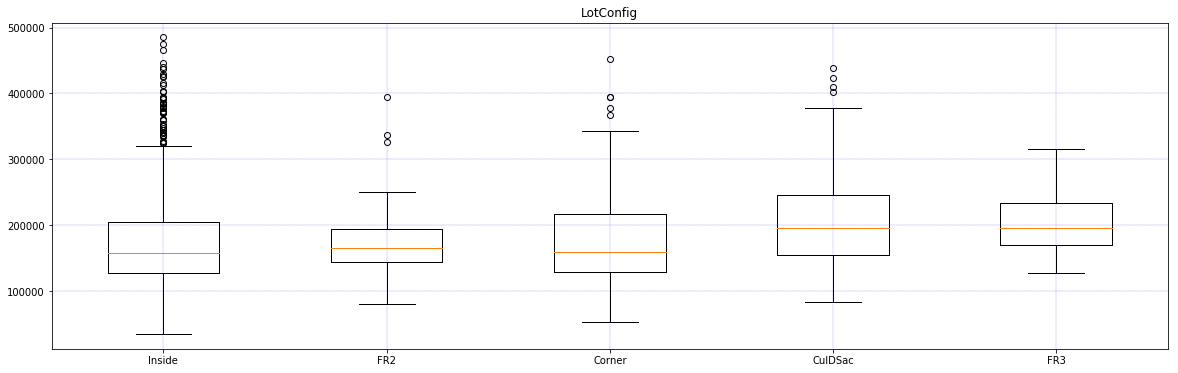

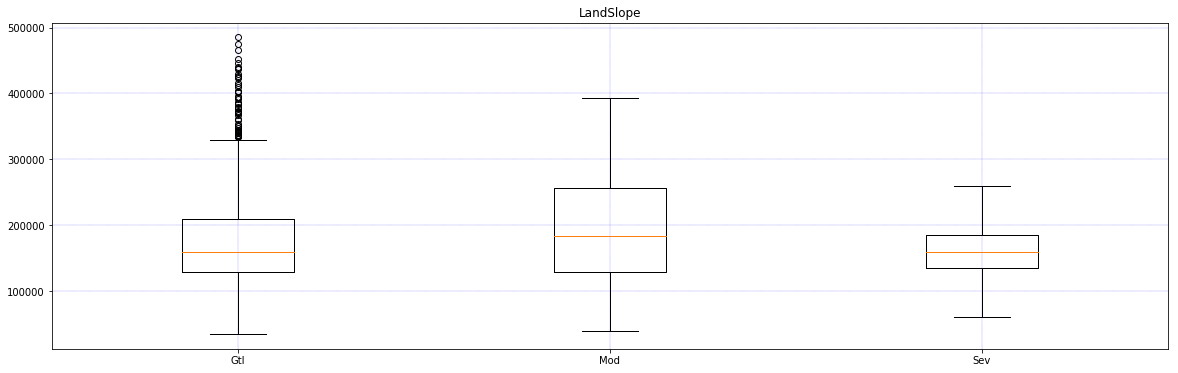

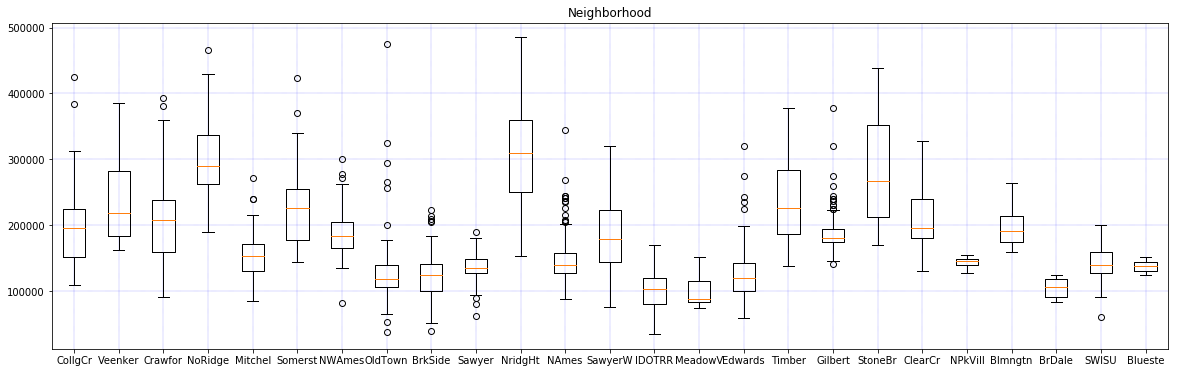

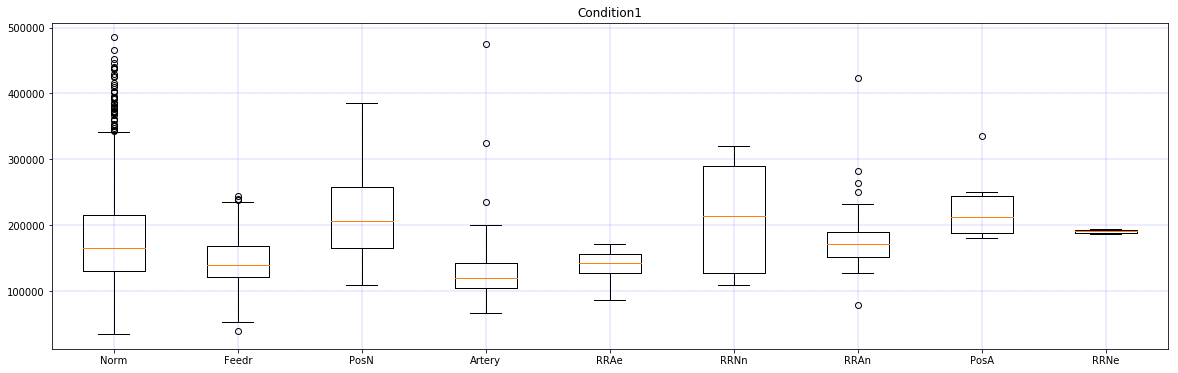

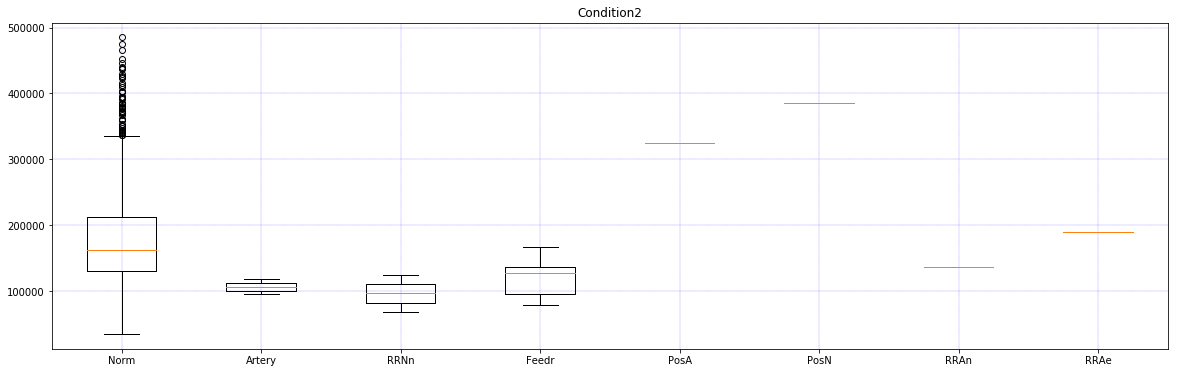

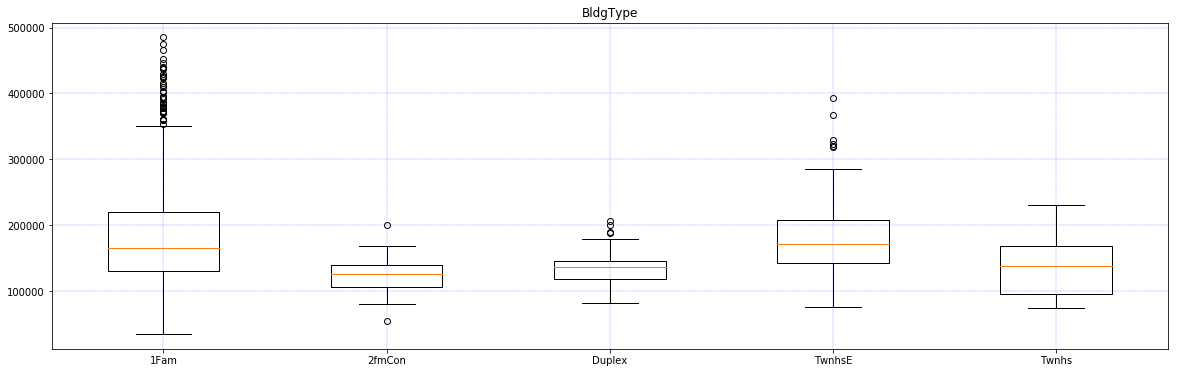

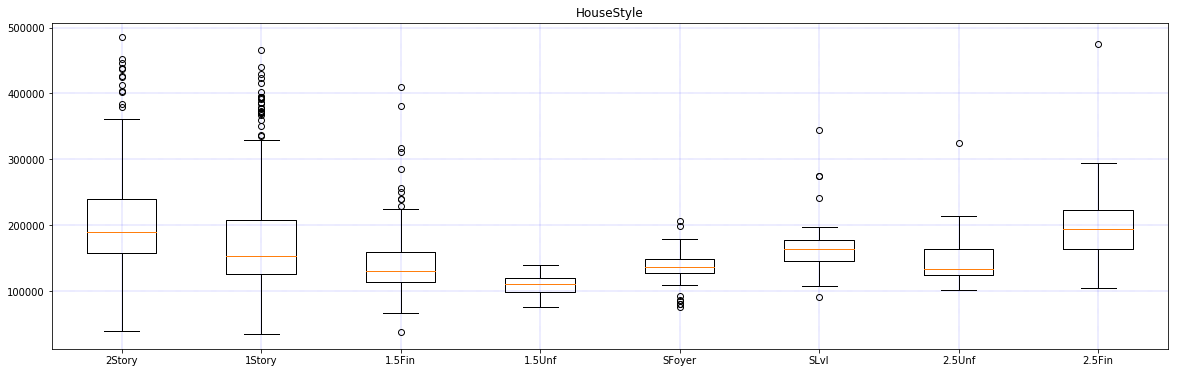

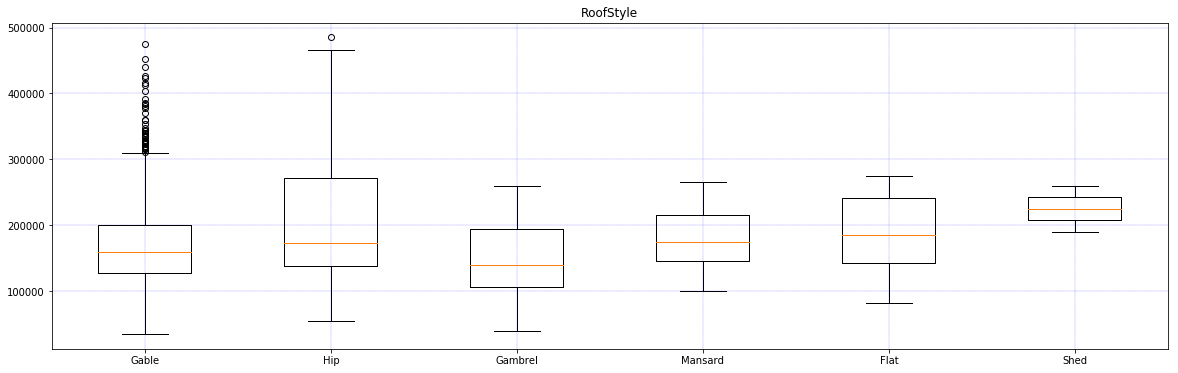

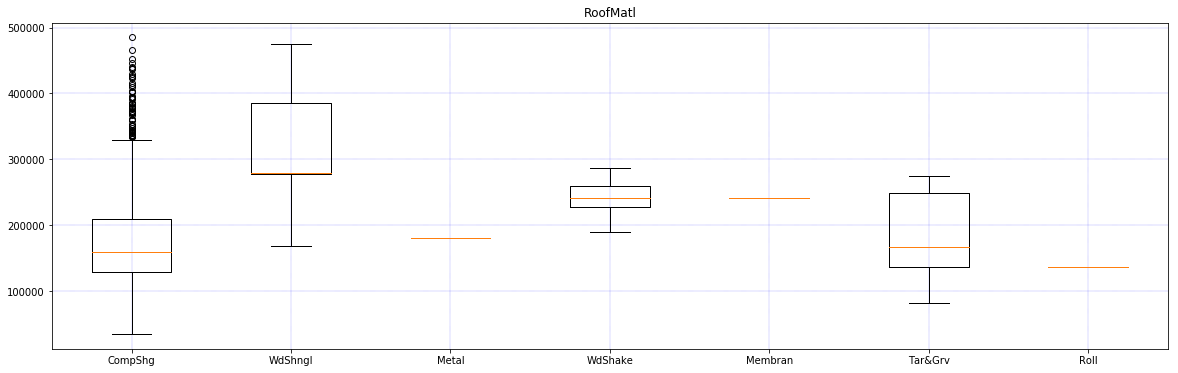

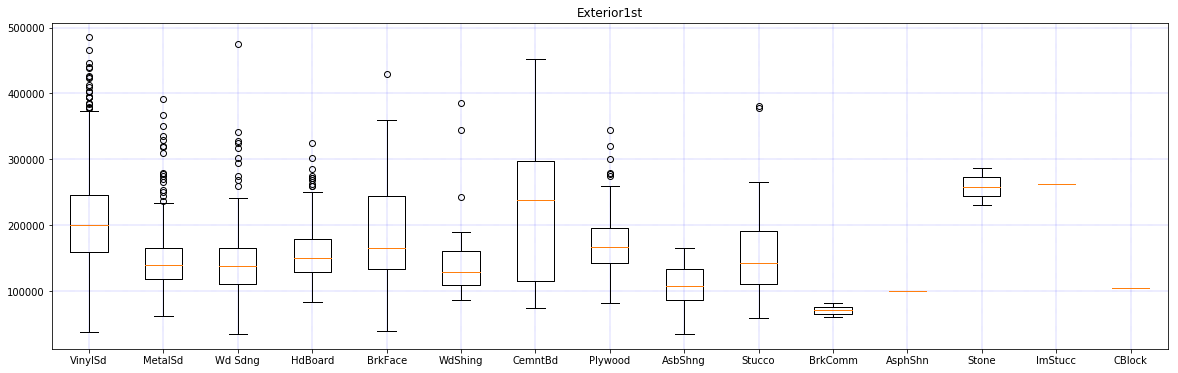

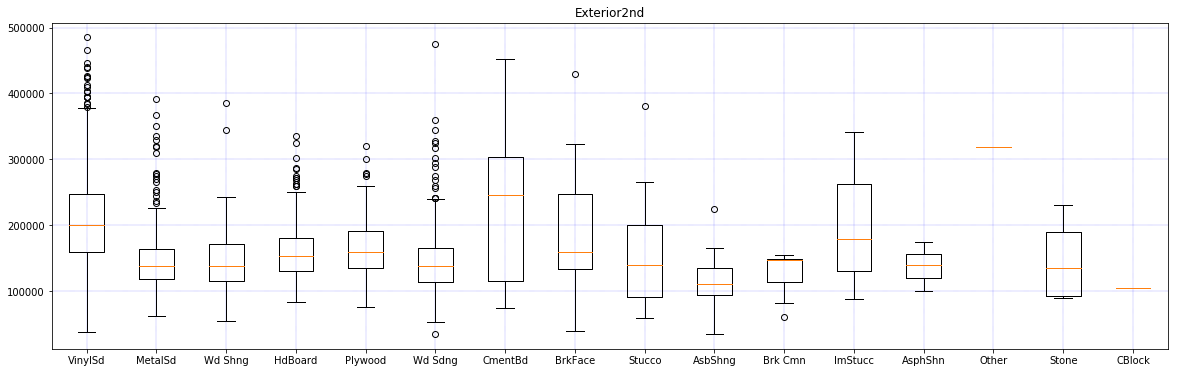

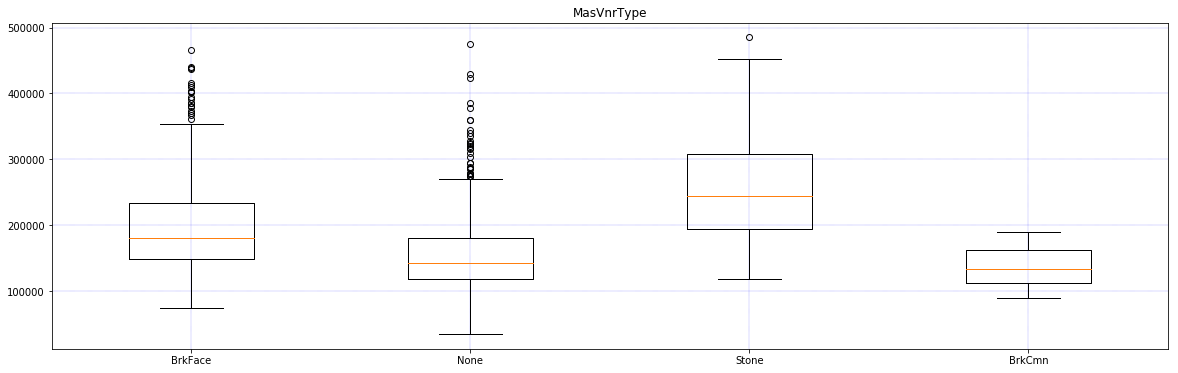

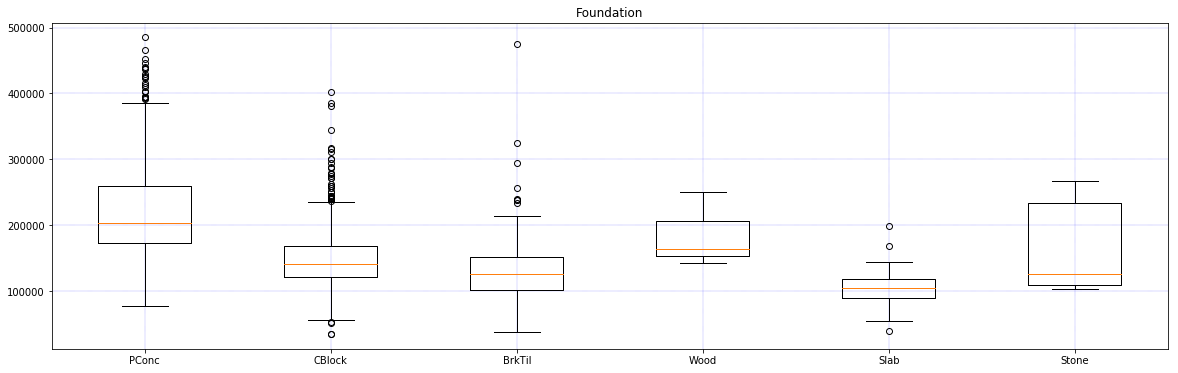

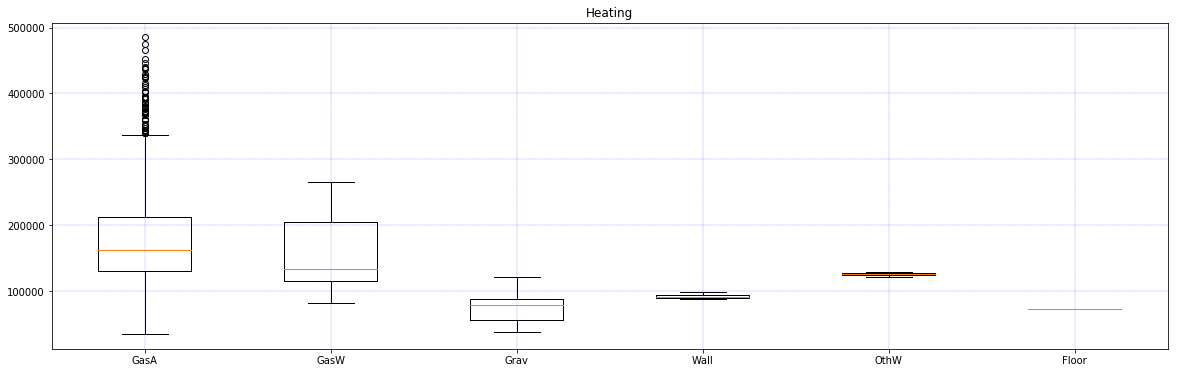

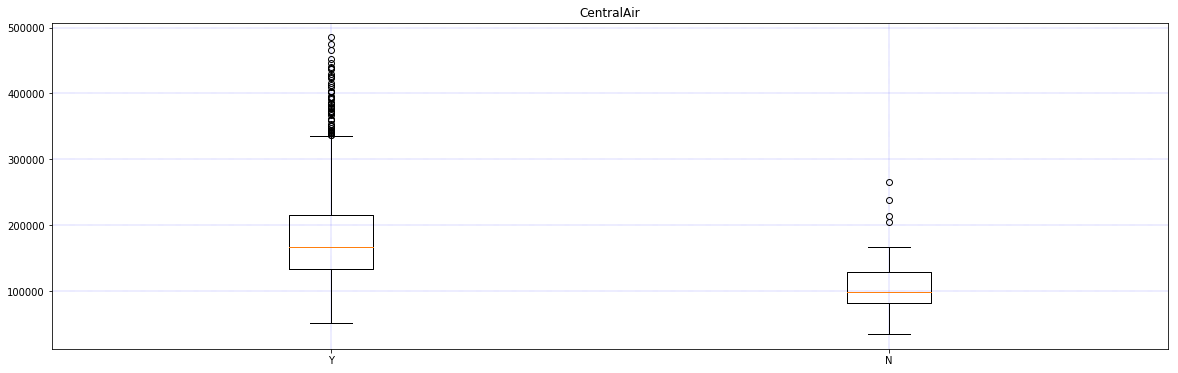

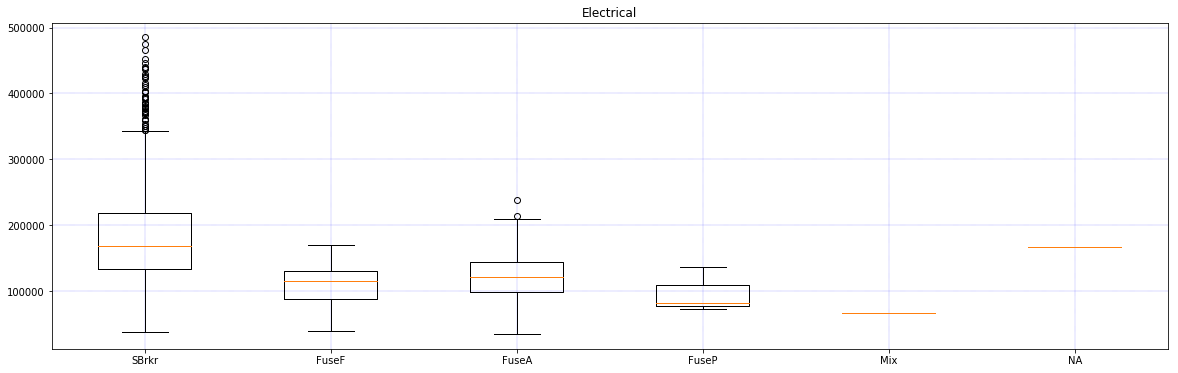

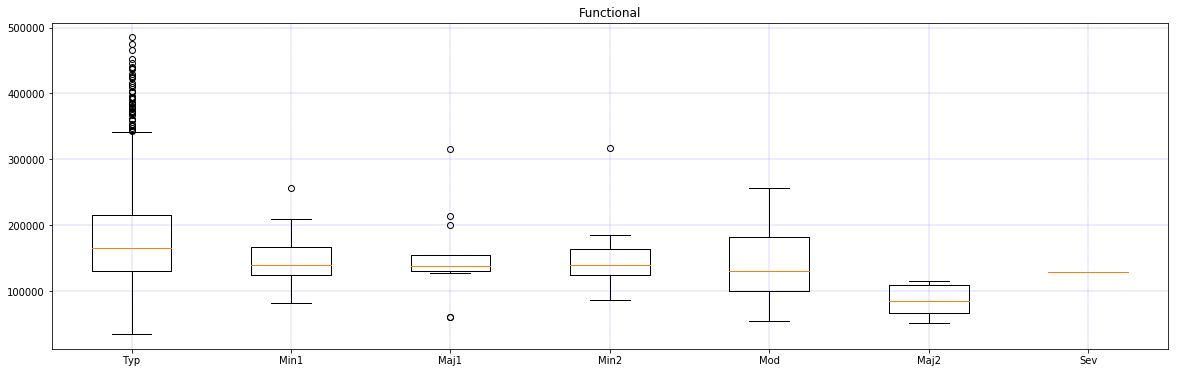

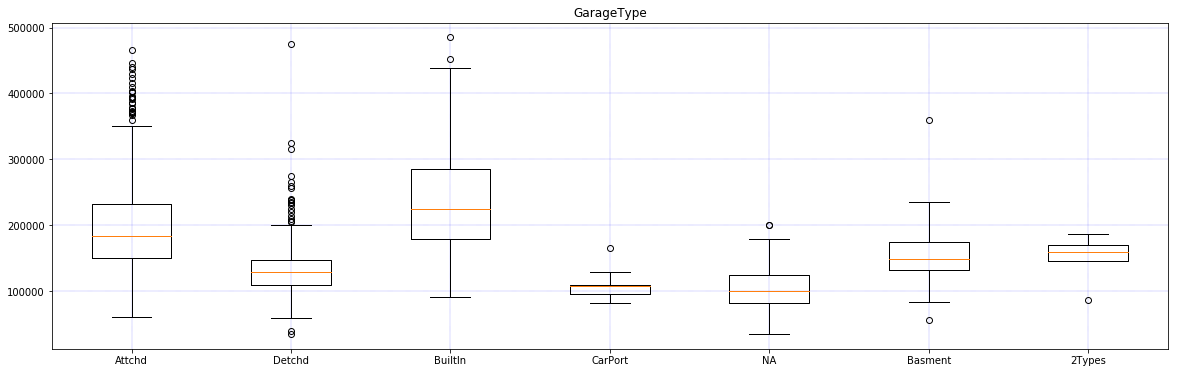

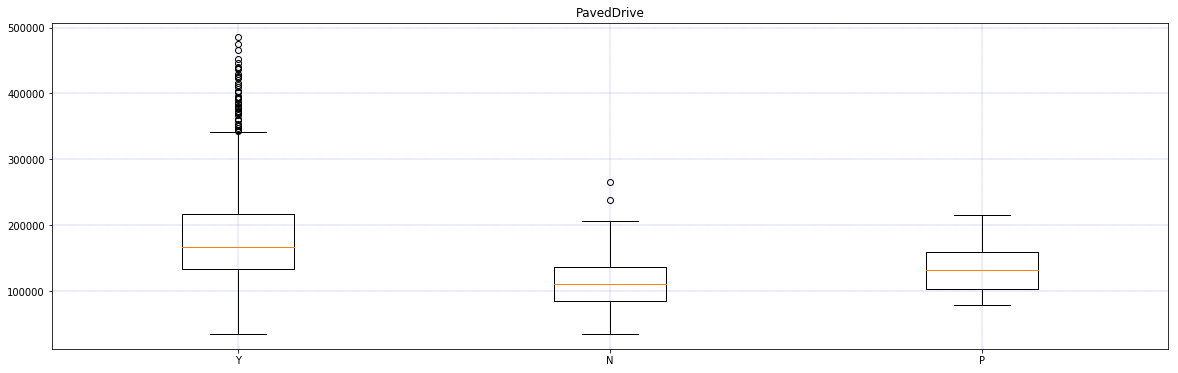

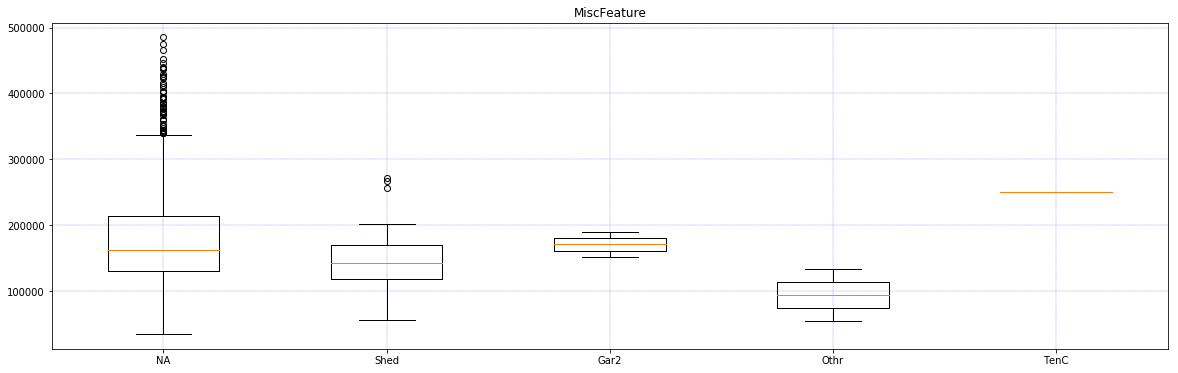

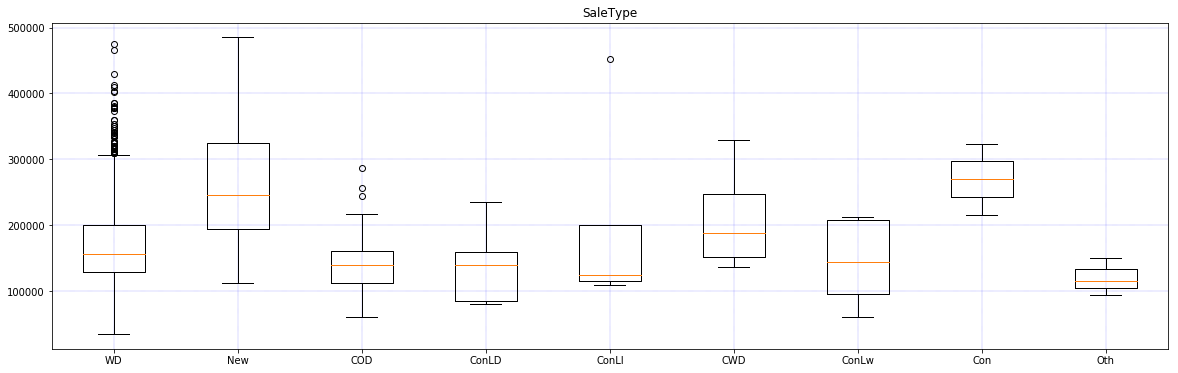

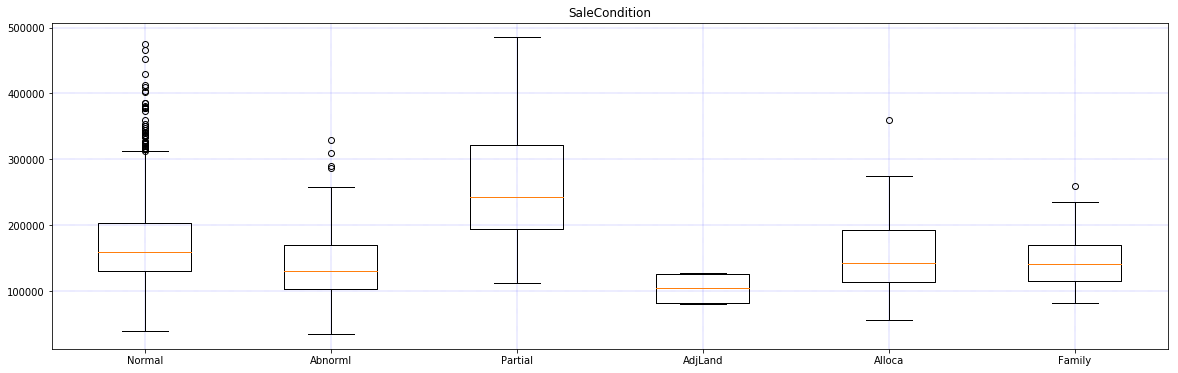

In [159]:
trainDataClassVarience = pd.merge(trainDataClass,trainDataSet['SalePrice'],left_index=True,right_index=True)

i = 1
for col in trainDataClassVarience.columns:
    classList=[]
    if col=='SalePrice': break
    for classes in trainDataClassVarience[col].unique():   
        classList.append(trainDataClassVarience[trainDataClassVarience[col]==classes]['SalePrice'])
    plt.figure(i,figsize=(20,6))
    plt.boxplot(classList, labels=trainDataClassVarience[col].unique())

    plt.grid(color='b', linestyle='--', linewidth=0.2)
    plt.title(col)
    plt.show()
    i+=1

### 選擇特徵
> 對照測試資料集，篩選出無遺失資料且關聯性大的特徵

In [186]:
testDataSet = pd.read_csv('test.csv')
i = 1
for col in testDataSet.columns:
    if(i%5!=0):
        print("%-15s : %d\t" % (col,np.where(testDataSet[col].isnull())[0].size),end =' ')
    else:
        print("%-15s : %d\t" % (col,np.where(testDataSet[col].isnull())[0].size))
    i+=1

Id              : 0	 MSSubClass      : 0	 MSZoning        : 4	 LotFrontage     : 227	 LotArea         : 0	
Street          : 0	 Alley           : 1352	 LotShape        : 0	 LandContour     : 0	 Utilities       : 2	
LotConfig       : 0	 LandSlope       : 0	 Neighborhood    : 0	 Condition1      : 0	 Condition2      : 0	
BldgType        : 0	 HouseStyle      : 0	 OverallQual     : 0	 OverallCond     : 0	 YearBuilt       : 0	
YearRemodAdd    : 0	 RoofStyle       : 0	 RoofMatl        : 0	 Exterior1st     : 1	 Exterior2nd     : 1	
MasVnrType      : 16	 MasVnrArea      : 15	 ExterQual       : 0	 ExterCond       : 0	 Foundation      : 0	
BsmtQual        : 44	 BsmtCond        : 45	 BsmtExposure    : 44	 BsmtFinType1    : 42	 BsmtFinSF1      : 1	
BsmtFinType2    : 42	 BsmtFinSF2      : 1	 BsmtUnfSF       : 1	 TotalBsmtSF     : 1	 Heating         : 0	
HeatingQC       : 0	 CentralAir      : 0	 Electrical      : 0	 1stFlrSF        : 0	 2ndFlrSF        : 0	
LowQualFinSF    : 0	 GrLivArea       : 0	 B

In [185]:
HighVarianceList = ['Alley','BldgType','HouseStyle','CentralAir','MiscFeature','SaleCondition']
for rm in ['SalePrice','YearBuilt','YearRemodAdd','MasVnrArea','GarageYrBlt']:
    try:
        HighCorrList.remove(rm)
    except:
        print("Droped")
print("高關聯性數值特徵 : ")
print(HighCorrList)
print("高變異性類別特徵 : ")
print(HighVarianceList)

Droped
Droped
Droped
Droped
Droped
高關聯性數值特徵 : 
['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']
高變異性類別特徵 : 
['Alley', 'BldgType', 'HouseStyle', 'CentralAir', 'MiscFeature', 'SaleCondition']


# 處理訓練用特徵資料

In [194]:
trainDataValueFLT = trainDataValue[HighCorrList].astype('float32')
trainDataValueFLT.sample(5)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageFinish
1168,7.0,994.0,1028.0,1804.0,2.0,7.0,1.0,2.0,442.0,2.0,3.0,3.0,3.0,3.0,3.0
10,5.0,1040.0,1040.0,1040.0,1.0,5.0,0.0,1.0,384.0,2.0,3.0,4.0,2.0,0.0,1.0
46,7.0,1434.0,1518.0,2149.0,1.0,6.0,1.0,2.0,670.0,3.0,5.0,4.0,3.0,5.0,2.0
455,5.0,864.0,864.0,864.0,1.0,5.0,1.0,1.0,360.0,2.0,3.0,3.0,2.0,1.0,1.0
326,5.0,1056.0,1056.0,1056.0,1.0,6.0,0.0,1.0,308.0,2.0,3.0,1.0,2.0,0.0,2.0


### One Hot Encoding

In [196]:
trainDataClassFLT = trainDataClass[HighVarianceList]
trainDataClassFLT.sample(5)

,Alley,BldgType,HouseStyle,CentralAir,MiscFeature,SaleCondition
1257,NA,1Fam,1Story,Y,NA,Normal
1083,NA,1Fam,1Story,Y,NA,Family
977,NA,1Fam,1.5Fin,Y,NA,Abnorml
1227,NA,1Fam,1Story,Y,NA,Normal
54,NA,1Fam,SLvl,Y,NA,Normal


In [259]:
Alley = [['Grvl'],['Pave'],['NA']]
BldgType = [['1Fam'],['2fmCon'],['Duplex'],['Twnhs'],['TwnhsE']]
HouseStyle = [['1Story'],['1.5Fin'],['1.5Unf'],['2Story'],['2.5Fin'],['2.5Unf'],['SFoyer'],['SLvl']]
CentralAir = [['Y'],['N']]
MiscFeature = [['Elev'],['Gar2'],['Othr'],['Shed'],['TenC'],['NA']]
SaleCondition = [['Normal'],['Abnorml'],['AdjLand'],['Alloca'],['Family'],['Partial']]

OneHotClassList = {'Alley':Alley, 'BldgType':BldgType, 'HouseStyle':HouseStyle, 'CentralAir':CentralAir,'MiscFeature':MiscFeature, 'SaleCondition':SaleCondition}
encoderList=[]
for classes in OneHotClassList:
    encoder = OneHotEncoder()
    encoder.fit(OneHotClassList[classes])
    encoderList.append(encoder.transform(np.array(trainDataClassFLT[classes]).reshape(-1,1)).toarray())

In [257]:
trainDataClassFLT['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [258]:
testDataSet['BldgType'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

In [19]:
trainData_value = trainDataSet['Id']
trainData_object = trainDataSet['Id']
for i in trainDataSet.columns:
    if trainDataSet[i].dtype != 'object':
        trainData_value = pd.merge(trainData_value, trainDataSet[i], left_index=True, right_index=True)
    else:
        trainData_object = pd.merge(trainData_object, trainDataSet[i], left_index=True, right_index=True)
trainData_value = trainData_value.drop(['Id_x','Id_y'], axis = 1)
trainData_object = trainData_object.drop(['Id'], axis = 1)

### Value features missing value processing 

In [600]:
trainData_value['HouseYr'] = trainData_value['YrSold']-trainData_value['YearBuilt']

try:
    trainData_value = trainData_value.drop(['GarageYrBlt'], axis = 1)
    trainData_value = trainData_value.drop(['LotFrontage'], axis = 1)
    
except:
    print("Have done")
     

for index in np.where(trainData_value['MasVnrArea'].isnull()):
    trainData_value = trainData_value.drop(index).reset_index(drop=True)
    trainData_object = trainData_object.drop(index).reset_index(drop=True)
    # Keep object and value have same number of index
    
# for col in trainData_value.columns:
#     print(col," has na : ",np.where(trainData_value[col].isnull())[0].size)
    
print("After drop some columns the size (value): ",trainData_value.shape)
print("After drop some columns the size (object): ",trainData_object.shape)

After drop some columns the size (value):  (1452, 36)
After drop some columns the size (object):  (1452, 43)


### Object features missing value processing

In [601]:
try:
    trainData_object = trainData_object.drop(['Alley'], axis = 1)
except:
    print("Have done")
    
# for index in np.where(trainData_object['GarageType'].isnull()):
#     trainData_value = trainData_value.drop(index).reset_index(drop=True)
#     trainData_object = trainData_object.drop(index).reset_index(drop=True)
#     # Keep object and value have same number of index    
    
for index in np.where(trainData_object['Electrical'].isnull()):
    trainData_value = trainData_value.drop(index).reset_index(drop=True)
    trainData_object = trainData_object.drop(index).reset_index(drop=True)
     # Keep object and value have same number of index   


Exter_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':0}
Bsmt_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
BsmtEx_qualDict = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
BsmtFT_qualDict = {'GLQ':6 ,'ALQ':5 ,'BLQ':4 ,'Rec':3 ,'LwQ':2 ,'Unf':1 ,'NA':0}
Heating_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':0}
Kitchen_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':0}
Fireplace_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
GarageFsh_qualDict = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
Garage_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
Pool_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0}
Fence_qualDict = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

try:
    trainData_object['FireplaceQu'] = trainData_object['FireplaceQu'].fillna('NA')
    trainData_object['BsmtQual'] = trainData_object['BsmtQual'].fillna('NA')
    trainData_object['BsmtCond'] = trainData_object['BsmtCond'].fillna('NA')
    trainData_object['BsmtExposure'] = trainData_object['BsmtExposure'].fillna('NA')
    trainData_object['BsmtFinType1'] = trainData_object['BsmtFinType1'].fillna('NA')
    trainData_object['BsmtFinType2'] = trainData_object['BsmtFinType2'].fillna('NA')
    trainData_object['GarageType'] = trainData_object['GarageType'].fillna('NA')
    trainData_object['GarageFinish'] = trainData_object['GarageFinish'].fillna('NA')
    trainData_object['GarageQual'] = trainData_object['GarageQual'].fillna('NA')
    trainData_object['GarageCond'] = trainData_object['GarageCond'].fillna('NA')
    trainData_object['PoolQC'] = trainData_object['PoolQC'].fillna('NA')
    trainData_object['Fence'] = trainData_object['Fence'].fillna('NA')
    trainData_object['MiscFeature'] = trainData_object['MiscFeature'].fillna('NA')
    for index in range(trainData_object.shape[0]):
        trainData_value.loc[index,'ExterQual'] = Exter_qualDict[trainData_object.loc[index,'ExterQual']]
        trainData_value.loc[index,'ExterCond'] = Exter_qualDict[trainData_object.loc[index,'ExterCond']]
        trainData_value.loc[index,'BsmtQual'] = Bsmt_qualDict[trainData_object.loc[index,'BsmtQual']]
        trainData_value.loc[index,'BsmtCond'] = Bsmt_qualDict[trainData_object.loc[index,'BsmtCond']]
        trainData_value.loc[index,'BsmtExposure'] = BsmtEx_qualDict[trainData_object.loc[index,'BsmtExposure']]
        trainData_value.loc[index,'BsmtFinType1'] = BsmtFT_qualDict[trainData_object.loc[index,'BsmtFinType1']]
        trainData_value.loc[index,'BsmtFinType2'] = BsmtFT_qualDict[trainData_object.loc[index,'BsmtFinType2']]
        trainData_value.loc[index,'HeatingQC'] = Heating_qualDict[trainData_object.loc[index,'HeatingQC']]
        trainData_value.loc[index,'KitchenQual'] = Kitchen_qualDict[trainData_object.loc[index,'KitchenQual']]
        trainData_value.loc[index,'FireplaceQu'] = Fireplace_qualDict[trainData_object.loc[index,'FireplaceQu']]
        trainData_value.loc[index,'GarageFinish'] = GarageFsh_qualDict[trainData_object.loc[index,'GarageFinish']]
        trainData_value.loc[index,'GarageQual'] = Garage_qualDict[trainData_object.loc[index,'GarageQual']]
        trainData_value.loc[index,'GarageCond'] = Garage_qualDict[trainData_object.loc[index,'GarageCond']]
        trainData_value.loc[index,'PoolQC'] = Pool_qualDict[trainData_object.loc[index,'PoolQC']]
        trainData_value.loc[index,'Fence'] = Fence_qualDict[trainData_object.loc[index,'Fence']]
    trainData_object = trainData_object.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence'],axis=1)
except:
    print("Drop Done")
# for col in trainData_object.columns:
#     print(col," has na : ",np.where(trainData_object[col].isnull())[0].size)
trainData_object_wPrice = pd.merge(trainData_object,trainData_value['SalePrice'],left_index=True,right_index=True)    
print("After drop some columns the size (value): ",trainData_value.shape)
print("After drop some columns the size (object): ",trainData_object.shape)

After drop some columns the size (value):  (1451, 51)
After drop some columns the size (object):  (1451, 27)


In [602]:
trainData_value.sample(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseYr,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
1386,60,12665,8,5,2005,2006,245.0,0,0,1094,1094,1133,1349,0,2482,0,0,2,1,4,1,9,1,3,642,144,39,0,0,0,0,0,2,2007,281213,2,4.0,3.0,4.0,4.0,4.0,1.0,1.0,5.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
560,30,13907,5,6,1940,1969,0.0,290,0,706,996,996,0,0,996,1,0,1,0,3,1,6,1,0,0,144,0,0,0,0,0,0,7,2008,108000,68,3.0,3.0,3.0,3.0,1.0,4.0,1.0,5.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0
1344,50,6000,6,9,1937,2000,0.0,0,0,698,698,786,390,0,1176,0,0,1,0,2,1,4,0,2,624,210,0,0,0,0,0,0,7,2009,134900,72,4.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,3.0,3.0,0.0,0.0
174,20,12416,6,5,1986,1986,132.0,1398,208,0,1606,1651,0,0,1651,1,0,2,0,3,1,7,1,2,616,192,0,0,0,0,0,0,11,2008,184000,22,3.0,3.0,4.0,2.0,1.0,5.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0
1016,50,9439,5,5,1930,1950,0.0,324,0,588,912,912,336,0,1248,0,0,1,0,2,1,6,0,1,160,0,0,192,0,0,0,0,3,2007,87000,77,3.0,3.0,3.0,3.0,1.0,2.0,1.0,4.0,3.0,0.0,1.0,2.0,2.0,0.0,0.0
1170,20,6951,5,5,1984,1985,0.0,658,0,218,876,923,0,0,923,1,0,1,0,3,1,5,0,1,264,362,0,0,0,0,0,0,10,2008,119500,24,3.0,3.0,3.0,3.0,1.0,5.0,1.0,3.0,3.0,0.0,1.0,3.0,3.0,0.0,3.0
213,20,13568,5,5,1995,1995,0.0,716,0,274,990,990,0,0,990,0,1,1,0,3,1,5,0,2,576,224,0,0,0,0,0,0,7,2006,156000,11,3.0,3.0,4.0,3.0,1.0,5.0,1.0,5.0,3.0,0.0,1.0,3.0,3.0,0.0,0.0
310,20,8000,6,6,1948,2002,0.0,680,0,292,972,972,0,0,972,1,0,1,0,2,1,5,1,1,240,0,0,0,0,0,0,0,5,2009,132000,61,3.0,4.0,3.0,3.0,1.0,5.0,1.0,5.0,3.0,4.0,1.0,3.0,3.0,0.0,0.0
878,50,13758,7,5,1990,1991,117.0,902,0,254,1156,1187,530,0,1717,0,0,2,1,3,1,7,1,2,400,168,36,0,0,0,0,0,4,2007,187500,17,4.0,4.0,4.0,3.0,2.0,2.0,1.0,5.0,4.0,3.0,2.0,3.0,3.0,0.0,0.0
1317,30,3636,4,4,1922,1950,0.0,0,0,796,796,796,0,0,796,0,0,1,0,2,1,5,0,0,0,0,0,100,0,0,0,0,1,2008,55000,86,3.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0


### Correlation Analysis

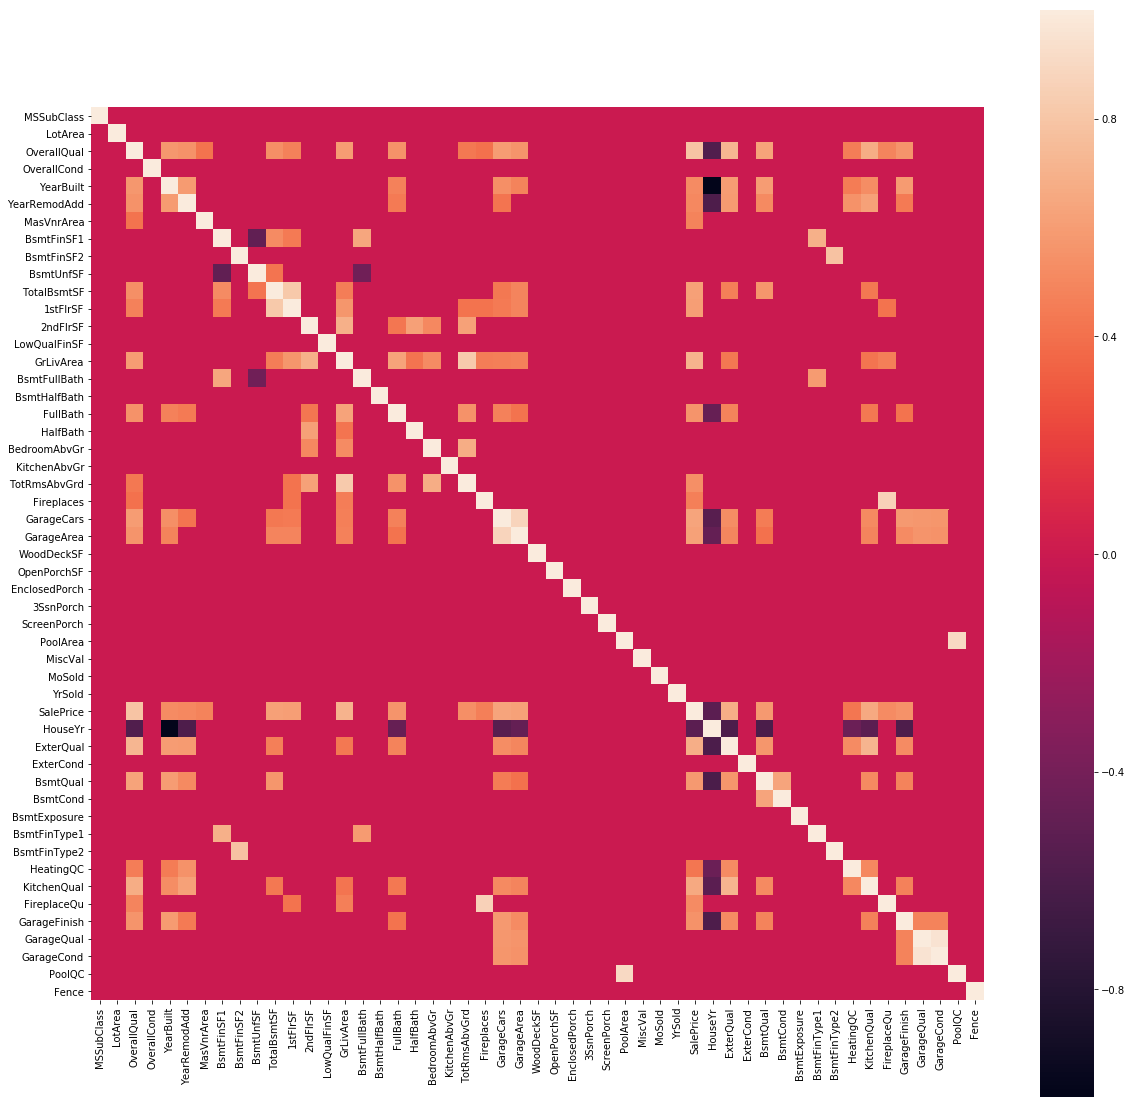

In [603]:
train_corr = trainData_value.corr()
train_corr[(train_corr<0.4) & (train_corr>-0.4)]=0
corr_list=[]
for col in train_corr.columns:
    if col != 'SalePrice':
        if train_corr.loc['SalePrice',col]>0.2 or train_corr.loc['SalePrice',col]<-0.2:
            corr_list.append(col)
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(train_corr, square=True)

In [604]:
trainDataSet_valueFiltered = trainData_value.copy()
for col in trainDataSet_valueFiltered.columns:
    if col not in corr_list:
        trainDataSet_valueFiltered = trainDataSet_valueFiltered.drop([col],axis=1)
try:
    trainDataSet_valueFiltered = trainDataSet_valueFiltered.drop(['YearBuilt','YearRemodAdd'],axis=1)
except:
    print()
trainDataSet_valueFiltered.sample(5)
try:
    trainDataSet_valueFiltered = trainDataSet_valueFiltered.drop('MasVnrArea',axis=1)
except:
    print()

### Class variance analysis

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
810,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,Shed,COD,Normal
599,RM,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,PConc,GasA,Y,SBrkr,Typ,Detchd,P,NA,WD,Normal
1129,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,GasA,N,SBrkr,Typ,Detchd,Y,NA,WD,Normal
430,RM,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,BrkTil,GasA,Y,SBrkr,Typ,NA,N,NA,ConLD,Abnorml
619,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal


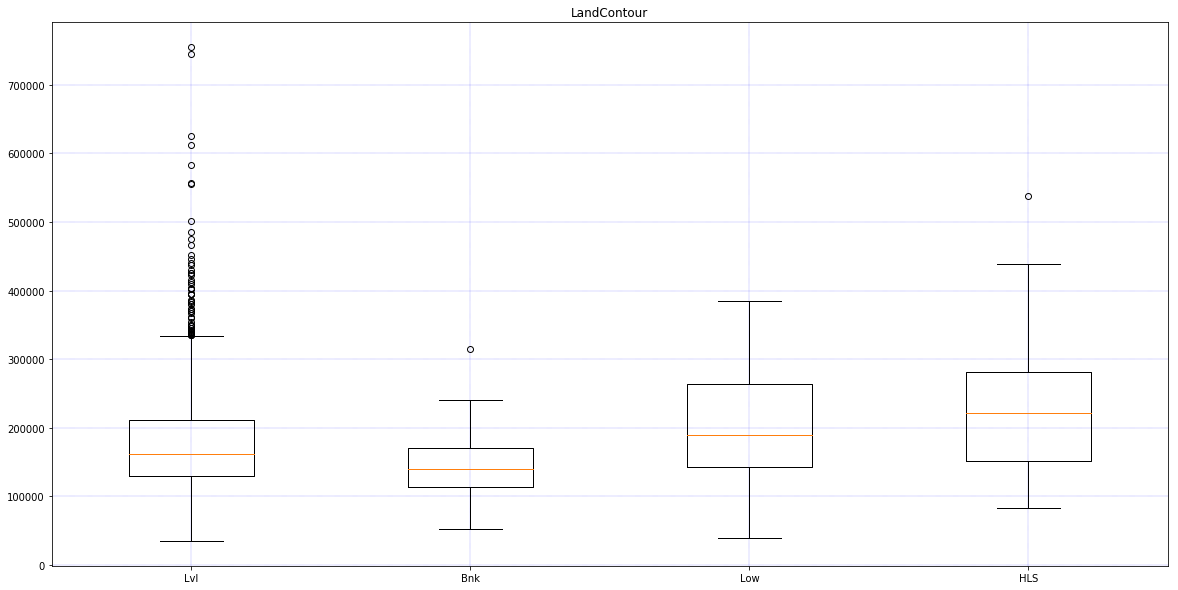

In [605]:
import warnings
warnings.filterwarnings('ignore')


object_list=[]
Item = "LandContour"
plt.figure(1,figsize=(20,10))
for i in trainData_object_wPrice[Item].unique():
    pltbox = plt.subplot()
    object_list.append(trainData_object_wPrice[trainData_object_wPrice[Item]==i]['SalePrice'])
pltbox.boxplot(object_list)
plt.xticks(range(1,1+len(trainData_object_wPrice[Item].unique())),trainData_object_wPrice[Item].unique())
plt.grid(color='b', linestyle='--', linewidth=0.2)
plt.title(Item)
trainData_object.sample(5)  

# choosing : CentralAir Heating, MSZoning, HouseStyle

In [606]:
trainData_objectFilter = trainData_object[['CentralAir','Heating','HouseStyle','SaleType']]
trainData_objectFilter_OneHot = pd.DataFrame(trainData_objectFilter['CentralAir'])

for col in trainData_objectFilter.columns:
    trainData_objectFilter_OneHot = pd.merge(trainData_objectFilter_OneHot,pd.get_dummies(trainData_objectFilter[col]),left_index=True,right_index=True)
trainData_objectFilter_OneHot = trainData_objectFilter_OneHot.drop(['CentralAir'],axis=1)

trainData_objectFilter_OneHot.sample(5)

,N,Y,Floor,GasA,GasW,Grav,OthW,Wall,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
810,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
974,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1396,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
913,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1230,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### Filtered Data Processing

In [607]:
trainData = pd.merge(trainDataSet_valueFiltered,trainData_objectFilter_OneHot,left_index=True, right_index=True)
#trainData = trainDataSet_valueFiltered
labelData = trainData_value['SalePrice']


temp = pd.merge(trainData ,labelData ,left_index=True, right_index=True)
temp = temp[(temp['SalePrice']<500000)]

trainData = temp.drop(['SalePrice'],axis=1)
labelData = temp['SalePrice']
trainData.shape


(1442, 41)

# PCA

In [608]:
# from sklearn import decomposition
# pca = decomposition.PCA(30)
# pca.fit(trainData)
# trainData = pca.transform(trainData)

### Import Scikit-Learn Module

In [609]:
from sklearn.linear_model import SGDRegressor,Lasso ,Ridge, ElasticNet
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [612]:
X_train, X_test, y_train, y_test = train_test_split(trainData,labelData,test_size=0.01)

StdObject = StandardScaler()
StdObject.fit(trainData)

X_trainStd = StdObject.transform(X_train)
X_testStd = StdObject.transform(X_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [613]:
estimator = xgb.XGBRegressor(n_estimators=71,max_depth=4)
estimator.fit(X_trainStd, y_train)
print("R score %.2f "%estimator.score(X_testStd, y_test))
print("RMSE : %.2f"%np.sqrt(np.mean((estimator.predict(X_testStd) - y_test)**2)))

R score 0.86 
RMSE : 16654.84


In [614]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\ChiWei-Weng\\Anaconda3\\envs\\tensor-gpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

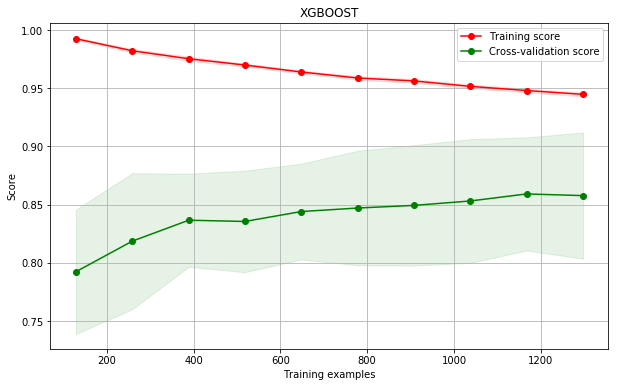

In [615]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=None, shuffle=True)
plot_learning_curve(estimator, "XGBOOST", StdObject.transform(trainData), labelData.values.ravel(), cv=cv, train_sizes=np.linspace(0.1, 1.0, 10))

### Test file Preocessing

In [616]:
testDataSet = pd.read_csv('test.csv')

In [617]:
testData_value = testDataSet['Id']
testData_object = testDataSet['Id']
for i in testDataSet.columns:
    if testDataSet[i].dtype != 'object':
        testData_value = pd.merge(testData_value, testDataSet[i], left_index=True, right_index=True)
    else:
        testData_object = pd.merge(testData_object, testDataSet[i], left_index=True, right_index=True)
testData_value = testData_value.drop(['Id_x','Id_y'], axis = 1)
testData_object = testData_object.drop(['Id'], axis = 1)


In [618]:
testData_value['HouseYr'] = 2019-testData_value['YearBuilt']

try:
    testData_value = testData_value.drop(['GarageYrBlt'], axis = 1)
    testData_value = testData_value.drop(['LotFrontage'], axis = 1)
    
except:
    print("Have done")

# for index in np.where(testData_value['MasVnrArea'].isnull()):
#     testData_value = testData_value.drop(index).reset_index(drop=True)
#     testData_object = testData_object.drop(index).reset_index(drop=True)
#     # Keep object and value have same number of index
    
# for col in testData_value.columns:
#     print(col," has na : ",np.where(testData_value[col].isnull())[0].size)
    
print("After drop some columns the size (value): ",testData_value.shape)
print("After drop some columns the size (object): ",testData_object.shape)

After drop some columns the size (value):  (1461, 35)
After drop some columns the size (object):  (1461, 43)


In [619]:
try:
    testData_object = testData_object.drop(['Alley'], axis = 1)
except:
    print("Have done")
    
# for index in np.where(testData_object['GarageType'].isnull()):
#     testData_value = testData_value.drop(index).reset_index(drop=True)
#     testData_object = testData_object.drop(index).reset_index(drop=True)
#     # Keep object and value have same number of index    
    
for index in np.where(testData_object['Electrical'].isnull()):
    testData_value = testData_value.drop(index).reset_index(drop=True)
    testData_object = testData_object.drop(index).reset_index(drop=True)
     # Keep object and value have same number of index   


Exter_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Bsmt_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
BsmtEx_qualDict = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
BsmtFT_qualDict = {'GLQ':6 ,'ALQ':5 ,'BLQ':4 ,'Rec':3 ,'LwQ':2 ,'Unf':1 ,'NA':0}
Heating_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Kitchen_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Fireplace_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
GarageFsh_qualDict = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
Garage_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
Pool_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0}
Fence_qualDict = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

try:
    testData_object['FireplaceQu'] = testData_object['FireplaceQu'].fillna('NA')
    testData_object['BsmtQual'] = testData_object['BsmtQual'].fillna('NA')
    testData_object['BsmtCond'] = testData_object['BsmtCond'].fillna('NA')
    testData_object['BsmtExposure'] = testData_object['BsmtExposure'].fillna('NA')
    testData_object['BsmtFinType1'] = testData_object['BsmtFinType1'].fillna('NA')
    testData_object['BsmtFinType2'] = testData_object['BsmtFinType2'].fillna('NA')
    testData_object['GarageType'] = testData_object['GarageType'].fillna('NA')
    testData_object['GarageFinish'] = testData_object['GarageFinish'].fillna('NA')
    testData_object['GarageQual'] = testData_object['GarageQual'].fillna('NA')
    testData_object['GarageCond'] = testData_object['GarageCond'].fillna('NA')
    testData_object['PoolQC'] = testData_object['PoolQC'].fillna('NA')
    testData_object['Fence'] = testData_object['Fence'].fillna('NA')
    testData_object['MiscFeature'] = testData_object['MiscFeature'].fillna('NA')
    testData_object['KitchenQual'] = testData_object['KitchenQual'].fillna('TA')
    for index in range(testData_object.shape[0]):
        testData_value.loc[index,'ExterQual'] = Exter_qualDict[testData_object.loc[index,'ExterQual']]
        testData_value.loc[index,'ExterCond'] = Exter_qualDict[testData_object.loc[index,'ExterCond']]
        testData_value.loc[index,'BsmtQual'] = Bsmt_qualDict[testData_object.loc[index,'BsmtQual']]
        testData_value.loc[index,'BsmtCond'] = Bsmt_qualDict[testData_object.loc[index,'BsmtCond']]
        testData_value.loc[index,'BsmtExposure'] = BsmtEx_qualDict[testData_object.loc[index,'BsmtExposure']]
        testData_value.loc[index,'BsmtFinType1'] = BsmtFT_qualDict[testData_object.loc[index,'BsmtFinType1']]
        testData_value.loc[index,'BsmtFinType2'] = BsmtFT_qualDict[testData_object.loc[index,'BsmtFinType2']]
        testData_value.loc[index,'HeatingQC'] = Heating_qualDict[testData_object.loc[index,'HeatingQC']]
        testData_value.loc[index,'KitchenQual'] = Kitchen_qualDict[testData_object.loc[index,'KitchenQual']]
        testData_value.loc[index,'FireplaceQu'] = Fireplace_qualDict[testData_object.loc[index,'FireplaceQu']]
        testData_value.loc[index,'GarageFinish'] = GarageFsh_qualDict[testData_object.loc[index,'GarageFinish']]
        testData_value.loc[index,'GarageQual'] = Garage_qualDict[testData_object.loc[index,'GarageQual']]
        testData_value.loc[index,'GarageCond'] = Garage_qualDict[testData_object.loc[index,'GarageCond']]
        testData_value.loc[index,'PoolQC'] = Pool_qualDict[testData_object.loc[index,'PoolQC']]
        testData_value.loc[index,'Fence'] = Fence_qualDict[testData_object.loc[index,'Fence']]
    testData_object = testData_object.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence'],axis=1)
except:
    print("Drop Done")


print("After drop some columns the size (value): ",testData_value.shape)
print("After drop some columns the size (object): ",testData_object.shape)

After drop some columns the size (value):  (1461, 50)
After drop some columns the size (object):  (1461, 27)


In [620]:
testData_value['TotalBsmtSF'] = testData_value['TotalBsmtSF'].fillna(testData_value['TotalBsmtSF'].mean())
testData_value['GarageCars'] = testData_value['GarageCars'].fillna(testData_value['GarageCars'].mean())
testData_value['GarageArea'] = testData_value['GarageArea'].fillna(testData_value['GarageArea'].mean())

# for col in testData_object.columns:
#     print(col," has na : ",np.where(testData_object[col].isnull())[0].size)
# print("------------------------------------------")
# for col in testData_value.columns:
#     print(col," has na : ",np.where(testData_value[col].isnull())[0].size)
# corr_list

In [621]:
testDataSet_valueFiltered = testData_value.copy()
for col in testDataSet_valueFiltered.columns:
    if col not in corr_list:
        testDataSet_valueFiltered = testDataSet_valueFiltered.drop([col],axis=1)
try:
    testDataSet_valueFiltered = testDataSet_valueFiltered.drop(['YearBuilt','YearRemodAdd'],axis=1)
except:
    print()

testDataSet_valueFiltered = testDataSet_valueFiltered.drop('MasVnrArea',axis=1)
testDataSet_valueFiltered.sample(5)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,HouseYr,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageFinish
794,6,923.0,947,1714.0,2,7,1,2.0,451.0,20,3.0,4.0,4.0,3.0,3.0,3.0
970,5,864.0,1238,1238.0,1,6,1,1.0,357.0,69,3.0,3.0,2.0,3.0,3.0,1.0
1126,7,1454.0,1478,1478.0,2,6,1,2.0,506.0,28,3.0,4.0,3.0,3.0,3.0,1.0
321,3,792.0,792,792.0,1,4,0,1.0,366.0,61,3.0,3.0,4.0,3.0,0.0,1.0
682,5,1060.0,1126,1126.0,1,5,0,2.0,506.0,35,3.0,4.0,3.0,3.0,0.0,1.0


In [622]:
testData_objectFilter = testData_object[['CentralAir','Heating','HouseStyle','SaleType']]
testData_objectFilter_OneHot = pd.DataFrame(testData_objectFilter['CentralAir'])

for col in testData_objectFilter.columns:
    testData_objectFilter_OneHot = pd.merge(testData_objectFilter_OneHot,pd.get_dummies(testData_objectFilter[col]),left_index=True,right_index=True)
testData_objectFilter_OneHot = testData_objectFilter_OneHot.drop(['CentralAir'],axis=1)

testData_objectFilter_OneHot.sample(5)

,N,Y,Floor,GasA,GasW,Grav,Othw,Wall,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
132,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
371,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1376,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1182,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
488,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [623]:
testData = pd.merge(testDataSet_valueFiltered,testData_objectFilter_OneHot,left_index=True, right_index=True)
#testData = testDataSet_valueFiltered
testData_objectFilter_OneHot.shape
testData = testData.dropna()
testData.shape

# from sklearn import decomposition
# pca = decomposition.PCA(20)
# pca.fit(testData)
# testData = pca.transform(testData)

(1459, 41)

In [624]:
testStd = StdObject.transform(testData)
Price = estimator.predict(testStd).T

In [625]:
prediction = pd.DataFrame(np.array([range(1461,2920),Price]).T,columns=('Id','SalePrice'))#.to_csv('Submission.csv',index=False)
prediction['Id'] = prediction['Id'].astype('int32')
prediction.to_csv('Submission.csv',index=False)